Wine Quality - Linear Regression

In [15]:
import pandas as pd 
df = pd.read_csv('datasets/winequality-merged.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [16]:
print(df.info())
print(df.describe())
# Verificar valores ausentes
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None
       fixed acidity  volatile acidity  citric acid  resid

In [17]:
print(df['color'].value_counts())

color
white    4898
red      1599
Name: count, dtype: int64


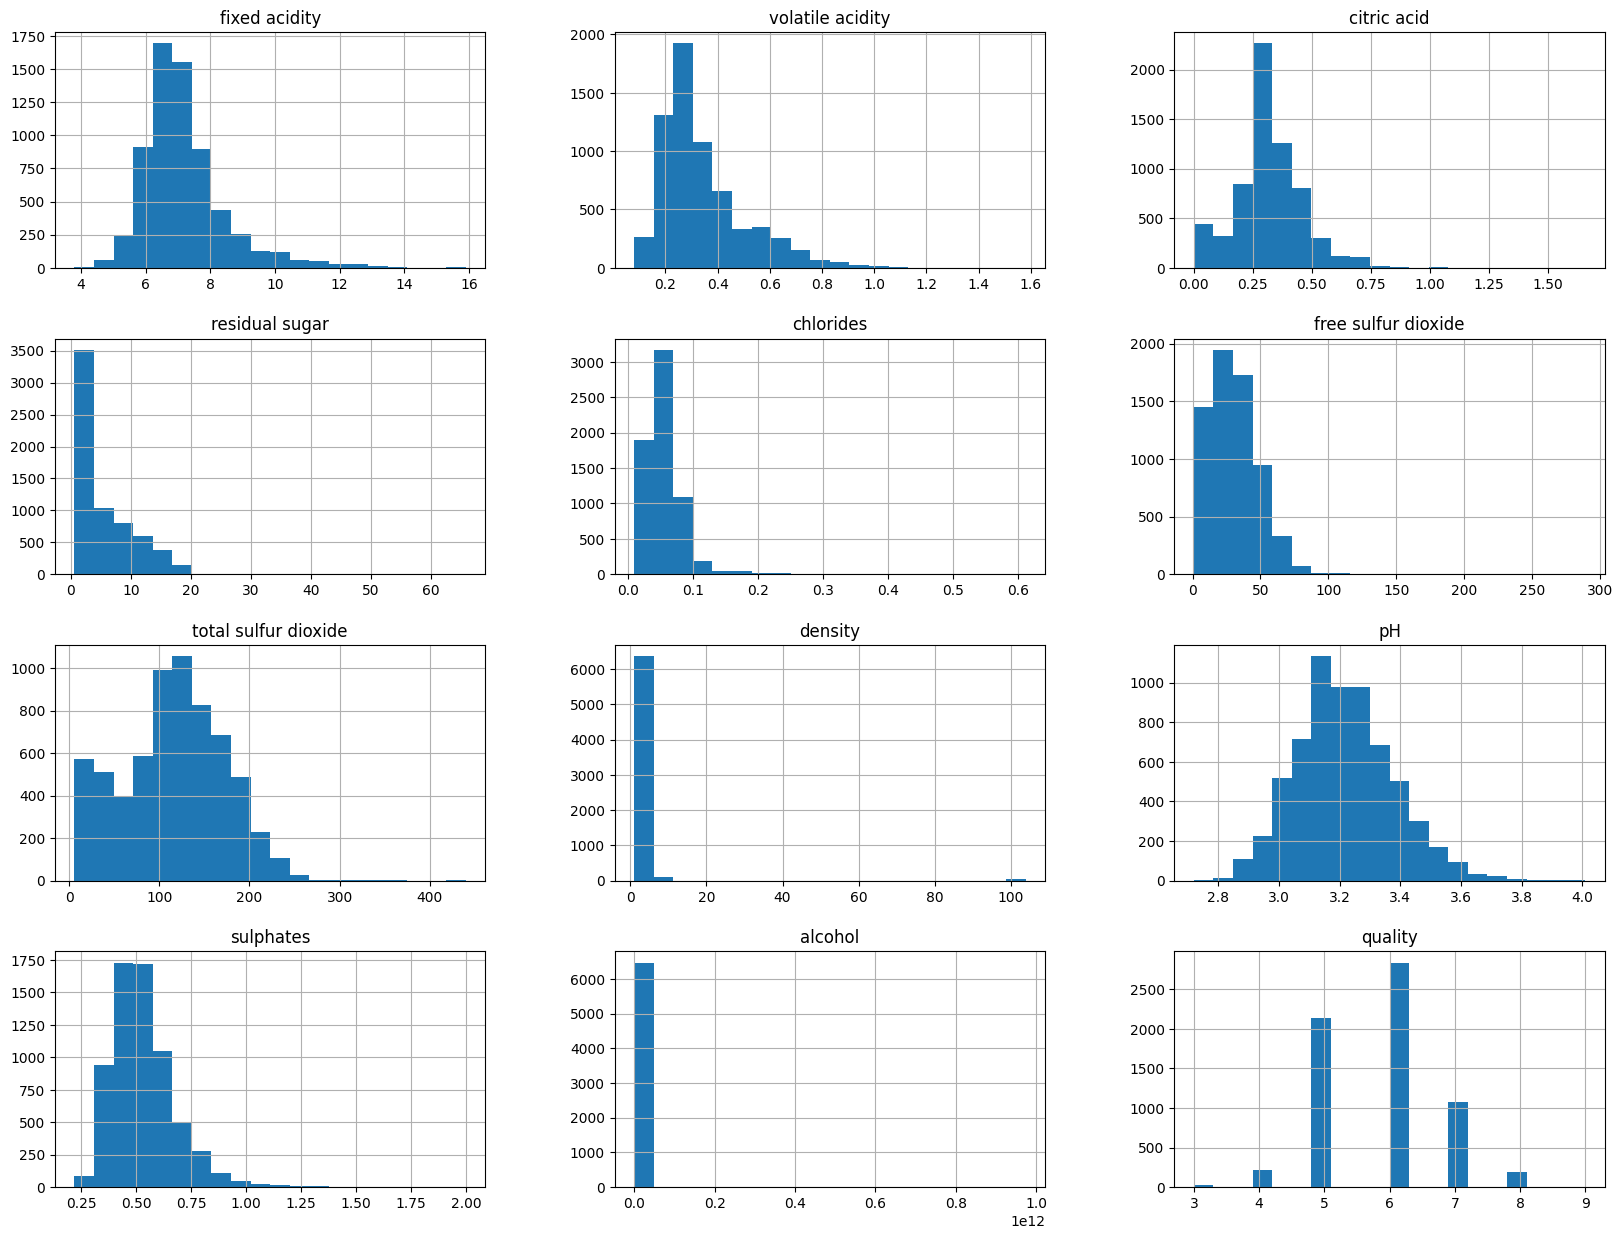

In [18]:
import matplotlib.pyplot as plt
df.hist(figsize=(20,15), bins=20)
plt.show()

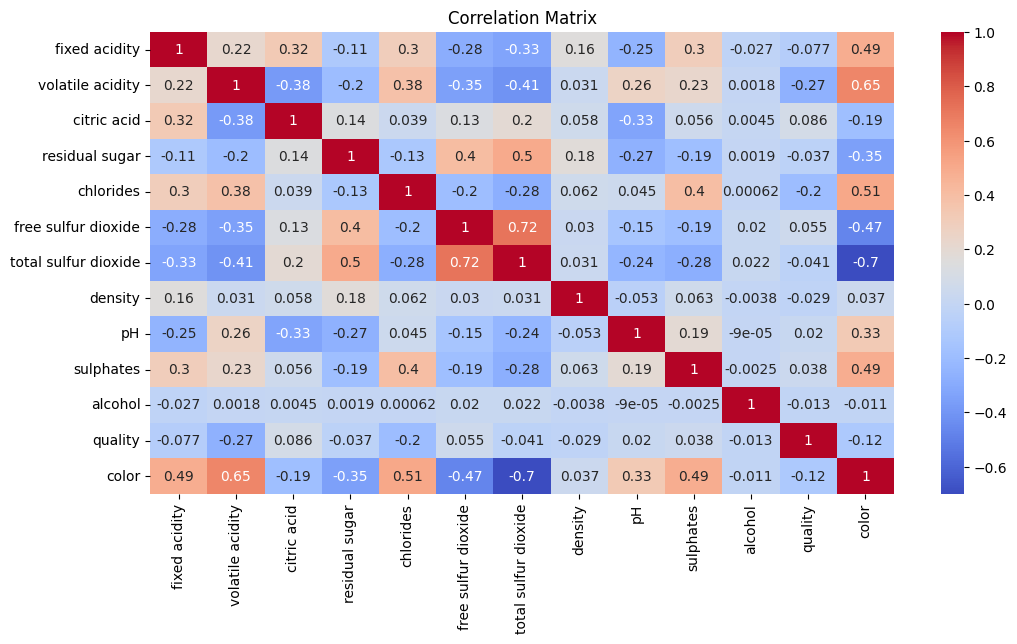

In [19]:
import seaborn as sns
# Converter a coluna categórica 'color' para valores numéricos
df['color'] = df['color'].map({'white': 0, 'red': 1})
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Definindo variáveis independentes
x = df.drop(columns=['quality'], axis=1)
y = df['quality']

# Dividindo o dataset em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Instanciando o modelo de Regressão Linear
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
#fazendo previsões
y_pred = model.predict(x_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Erro quadrático médio(MSE): {mse:.2f}")
print(f"Coeficiente de determinação R2: {r2:.2f}")

Erro quadrático médio(MSE): 0.62
Coeficiente de determinação R2: 0.15


Erro Quadrático Médio (MSE): 0.62
Coeficiente de Determinação (R²): 0.15


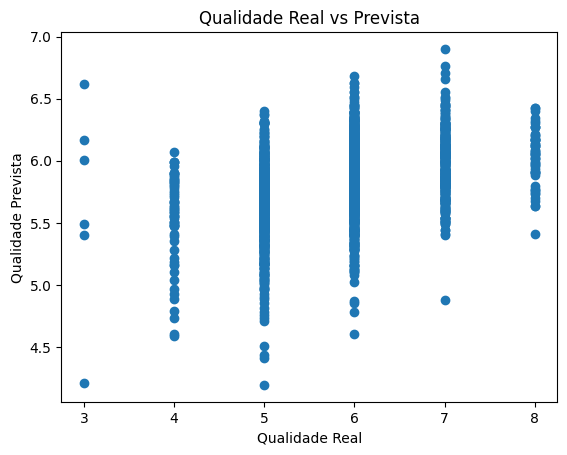

In [24]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

# Visualizar previsões vs valores reais
plt.scatter(y_test, y_pred)
plt.xlabel("Qualidade Real")
plt.ylabel("Qualidade Prevista")
plt.title("Qualidade Real vs Prevista")
plt.show()

In [25]:
# Definir limiar para "boa qualidade" (ex.: >= 6)
limiar = 6
y_pred_class = [1 if pred >= limiar else 0 for pred in y_pred]  # 1 = boa qualidade, 0 = ruim
y_test_class = [1 if real >= limiar else 0 for real in y_test]

# Calcular acurácia da "classificação"
acuracia = np.mean(np.array(y_pred_class) == np.array(y_test_class))
print(f"Acurácia da classificação (limiar {limiar}): {acuracia:.2f}")

Acurácia da classificação (limiar 6): 0.57


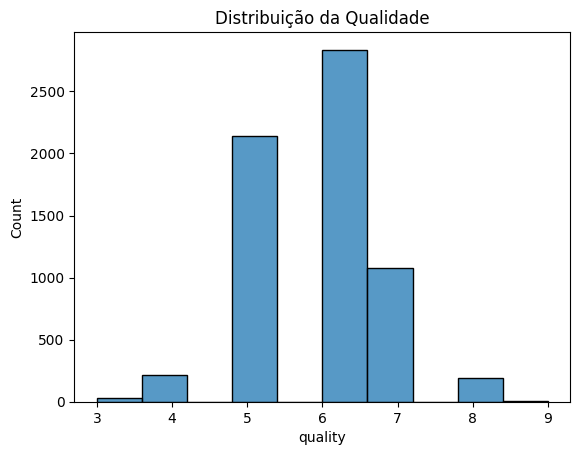

In [ ]:
# Visualizar a distribuição da qualidade
sns.histplot(df["quality"], bins=10)
plt.title("Distribuição da Qualidade")
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Treinar novamente
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Avaliar
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 0.62
R²: 0.15


In [28]:
limiar = 6  # Exemplo: qualidade >= 6 é "boa"
y_pred_class = [1 if pred >= limiar else 0 for pred in y_pred]
y_test_class = [1 if real >= limiar else 0 for real in y_test]

acuracia = np.mean(np.array(y_pred_class) == np.array(y_test_class))
print(f"Acurácia da classificação (limiar {limiar}): {acuracia:.2f}")

Acurácia da classificação (limiar 6): 0.57


"O modelo de Regressão Linear alcançou um R² de 0.15, indicando que apenas 15% da variância da qualidade é explicada pelas variáveis. Isso sugere que a relação entre as características físico-químicas e a qualidade não é predominantemente linear, mas o modelo ainda fornece uma aproximação útil dentro das restrições impostas."

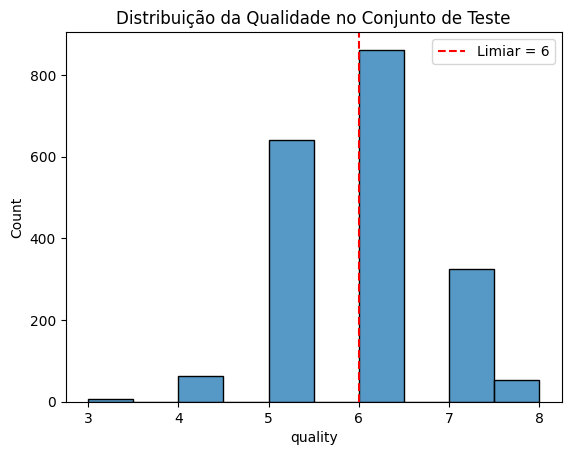

Proporção de vinhos de boa qualidade (≥ 6): 0.64


In [29]:
# Distribuição da qualidade real
sns.histplot(y_test, bins=10)
plt.axvline(x=6, color='red', linestyle='--', label='Limiar = 6')
plt.title("Distribuição da Qualidade no Conjunto de Teste")
plt.legend()
plt.show()

# Proporção de "boa qualidade" (≥ 6) vs "ruim" (< 6)
proporcao_boa = sum(y_test >= 6) / len(y_test)
print(f"Proporção de vinhos de boa qualidade (≥ 6): {proporcao_boa:.2f}")

In [30]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Converter previsões e valores reais em classes binárias
y_pred_class = [1 if pred >= 6 else 0 for pred in y_pred]
y_test_class = [1 if real >= 6 else 0 for real in y_test]

# Matriz de confusão
cm = confusion_matrix(y_test_class, y_pred_class)
print("Matriz de Confusão:")
print(cm)
# Exemplo de saída:
# [[TN, FP]
#  [FN, TP]]
# TN = True Negatives, FP = False Positives, FN = False Negatives, TP = True Positives

Matriz de Confusão:
[[631  78]
 [756 485]]
